In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.facecolor'] = "white"

In [2]:
reporte_caba = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/reporte-covid/dataset_reporte_covid_sitio_gobierno.csv")
fechas = []
for fecha in reporte_caba["FECHA"]:
    try:
        dia = fecha[0:2]
        mes = fecha[2:5]
        año = fecha[5:9]
        mes_num = dict(zip(["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","AGO","SEP","OCT","NOV","DEC"], 
                           ["01","02","03","04","05","06","07","08","08","09","10","11","12"]))
        fecha_nueva = pd.to_datetime(mes_num[mes] + "-" + dia + "-" + año)
    except:
        fecha_nueva = "NAN"
    fechas.append(fecha_nueva)
reporte_caba["fecha"] = fechas
reporte_caba = reporte_caba.sort_values("fecha")
camas = reporte_caba[reporte_caba.TIPO_DATO == "ocupacion_de_camas_sistema_publico"]


In [5]:
inicio_ola_2 = pd.to_datetime("2021-03-1")
inicio_ola_3 = pd.to_datetime("2021-11-20")

reporte_caba["dias_desde_ola_2"] = [i.days for i in (reporte_caba.fecha - inicio_ola_2)]
reporte_caba["dias_desde_ola_3"] = [i.days for i in (reporte_caba.fecha - inicio_ola_3)]

In [6]:
print("BASE ACTUALIZADA AL",reporte_caba.fecha.max().strftime('%d/%m/%Y'))

BASE ACTUALIZADA AL 10/07/2022


In [7]:
# casos_ola_2 = ola2[(ola2.TIPO_DATO  == "casos_residentes") &
#             (ola2.SUBTIPO_DATO == "casos_confirmados_reportados_del_dia")].copy()
# casos_ola_3 = ola3[(ola3.TIPO_DATO  == "casos_residentes") &
#             (ola3.SUBTIPO_DATO == "casos_confirmados_reportados_del_dia")].copy()


In [8]:
# posit_ola_2 = ola2[(ola2.TIPO_DATO  == "personas_hisopadas") &
#             (ola2.SUBTIPO_DATO == '%_positividad_personas_hisopadas_reportados_del_dia_caba')].copy()
# posit_ola_3 = ola3[(ola3.TIPO_DATO  == "personas_hisopadas") &
#             (ola3.SUBTIPO_DATO == '%_positividad_personas_hisopadas_reportados_del_dia_caba')].copy()


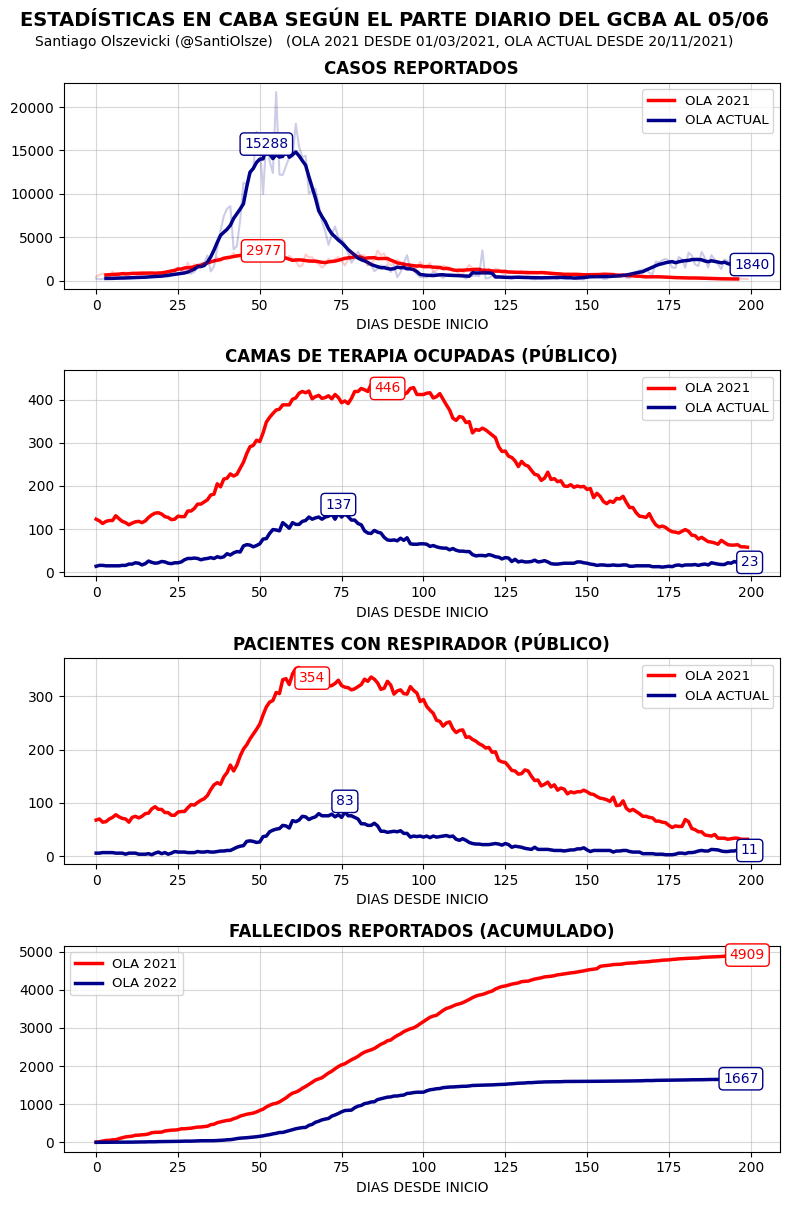

In [9]:
publico = True

fig, axs = plt.subplots(4,1, dpi = 100, figsize = (8,12))

lw = 2.5

dias = 200

ola2 = reporte_caba[reporte_caba.dias_desde_ola_2.isin(range(0,dias))].copy()
ola3 = reporte_caba[reporte_caba.dias_desde_ola_3.isin(range(0,dias))].copy()

casos_ola_2 = ola2[(ola2.TIPO_DATO  == "casos_residentes") &
            (ola2.SUBTIPO_DATO == "casos_confirmados_reportados_del_dia")].copy()
casos_ola_3 = ola3[(ola3.TIPO_DATO  == "casos_residentes") &
            (ola3.SUBTIPO_DATO == "casos_confirmados_reportados_del_dia")].copy()


fall_ola_2 = ola2[(ola2.TIPO_DATO  == "casos_residentes") &
            (ola2.SUBTIPO_DATO == "fallecidos_reportados_del_dia")].copy()
fall_ola_3 = ola3[(ola3.TIPO_DATO  == "casos_residentes") &
            (ola3.SUBTIPO_DATO == "fallecidos_reportados_del_dia")].copy()



if publico:
    camas_ola_2 = ola2[(ola2.TIPO_DATO == "ocupacion_de_camas_sistema_publico") & (ola2.SUBTIPO_DATO == 'graves_total')]
    camas_ola_3 = ola3[(ola3.TIPO_DATO == "ocupacion_de_camas_sistema_publico") & (ola3.SUBTIPO_DATO == 'graves_total')]
    respi_ola_2 = ola2[(ola2.TIPO_DATO == "ocupacion_de_camas_sistema_publico") & (ola2.SUBTIPO_DATO == 'graves_arm')]
    respi_ola_3 = ola3[(ola3.TIPO_DATO == "ocupacion_de_camas_sistema_publico") & (ola3.SUBTIPO_DATO == 'graves_arm')]
else:
    camaslinewidth = lw_ola_2 = ola2[(ola2.TIPO_DATO == "ocupacion_de_camas_sistema_privado") & (ola2.SUBTIPO_DATO == 'graves_total')]
    camas_ola_3 = ola3[(ola3.TIPO_DATO == "ocupacion_de_camas_sistema_privado") & (ola3.SUBTIPO_DATO == 'graves_total')]
    
fechas = []
# fechas = [
#           "2022-03-28", "2022-03-29"
#          ]

# casos = [363,496]
# camas = [30,24]
# fall = [0,0]

# #if publico:

#else:
#    camas = [132]
  
for i in range(len(fechas)):
    if pd.to_datetime(i) not in casos_ola_3.fecha:
        casos_ola_3 = casos_ola_3.append({"fecha":pd.to_datetime(fechas[i]),
                                          "VALOR":casos[i],
                                          "dias_desde_ola_3":((pd.to_datetime(fechas[i])-inicio_ola_3).days)},ignore_index = True)
        camas_ola_3 = camas_ola_3.append({"fecha":pd.to_datetime(fechas[i]),
                                          "VALOR":camas[i],
                                          "dias_desde_ola_3":((pd.to_datetime(fechas[i])-inicio_ola_3).days)},ignore_index = True)
    
        fall_ola_3= fall_ola_3.append({"fecha":pd.to_datetime(fechas[i]),
                                          "VALOR":fall[i],
                                          "dias_desde_ola_3":((pd.to_datetime(fechas[i])-inicio_ola_3).days)},ignore_index = True)
        


fall_ola_2.loc[:,"VALOR_R"] = fall_ola_2.VALOR.rolling(window = 7, center = True).mean()
fall_ola_3.loc[:,"VALOR_R"] =fall_ola_3.VALOR.rolling(window = 7, center = True).mean()

casos_ola_2.loc[:,"VALOR_R"] = casos_ola_2.VALOR.rolling(window = 7, center = True).mean()
casos_ola_3.loc[:,"VALOR_R"] =casos_ola_3.VALOR.rolling(window = 7, center = True).mean()

axs[0].plot(casos_ola_2.dias_desde_ola_2, casos_ola_2.VALOR.rolling(window = 7, center = True).mean(), label = "OLA 2021", color = "red",linewidth = lw)
axs[0].plot(casos_ola_3.dias_desde_ola_3, casos_ola_3.VALOR.rolling(window = 7, center = True).mean(), label = "OLA ACTUAL", color = "darkblue",linewidth = lw)
axs[0].plot(casos_ola_2.dias_desde_ola_2, casos_ola_2.VALOR.rolling(window = 1).mean(), color = "red", alpha= 0.2)
axs[0].plot(casos_ola_3.dias_desde_ola_3, casos_ola_3.VALOR.rolling(window = 1).mean(), color = "darkblue", alpha= 0.2)

axs[0].set_title("CASOS REPORTADOS", fontweight = "bold")
axs[0].set_xlabel("DIAS DESDE INICIO")


props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkblue")

axs[0].text(x = casos_ola_3[casos_ola_3.VALOR_R == casos_ola_3.VALOR_R.max()].dias_desde_ola_3.item(), 
            y = casos_ola_3.VALOR_R.max() - 20, 
            s = int(casos_ola_3[casos_ola_3.VALOR_R == casos_ola_3.VALOR_R.max()].VALOR_R.item()),
             color = "darkblue", bbox = props, ha = "center") 

axs[0].text(x = casos_ola_3.dias_desde_ola_3[:-2].max(), 
            y = casos_ola_3.VALOR_R.dropna().tail(1), 
            s = int(casos_ola_3.VALOR_R.dropna().tail(1).item()),
             color = "darkblue", bbox = props, va = "center") 

props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "red")

axs[0].text(x = casos_ola_2[casos_ola_2.VALOR_R == casos_ola_2.VALOR_R.max()].dias_desde_ola_2.item(), 
            y = casos_ola_2.VALOR_R.max() - 20, 
            s = int(casos_ola_2[casos_ola_2.VALOR_R == casos_ola_2.VALOR_R.max()].VALOR_R.item()),
             color = "red", bbox = props, ha = "center") 




axs[0].legend(loc = "upper right", fontsize= 9.5)

axs[1].plot(camas_ola_2.dias_desde_ola_2, camas_ola_2.VALOR.rolling(window = 1, center = True).mean(), label = "OLA 2021", color = "red",linewidth = lw)
axs[1].plot(camas_ola_3.dias_desde_ola_3, camas_ola_3.VALOR.rolling(window = 1, center = True).mean(), label = "OLA ACTUAL", color = "darkblue",linewidth = lw)
axs[1].plot(camas_ola_2.dias_desde_ola_2, camas_ola_2.VALOR.rolling(window = 1).mean(), alpha = .2, color = "red")
axs[1].plot(camas_ola_3.dias_desde_ola_3, camas_ola_3.VALOR.rolling(window = 1).mean(), alpha = .2, color = "darkblue")
axs[1].legend(loc = "upper right", fontsize= 9.5)
axs[1].set_title("CAMAS DE TERAPIA OCUPADAS (PÚBLICO)", fontweight = "bold")
axs[1].set_xlabel("DIAS DESDE INICIO")



props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkblue")

axs[1].text(x = camas_ola_3.dias_desde_ola_3.max(), 
            y = camas_ola_3.VALOR.tail(1), 
            s = int(camas_ola_3.VALOR.tail(1).item()),
             color = "darkblue", bbox = props, va = "center") 

axs[1].text(x = camas_ola_3[camas_ola_3.VALOR == camas_ola_3.VALOR.max()].dias_desde_ola_3.item(), 
            y = camas_ola_3.VALOR.max() + 20,  ha = "center",
            s = int(camas_ola_3[camas_ola_3.VALOR == camas_ola_3.VALOR.max()].VALOR.item()),
            color = "darkblue", bbox = props, va = "center") 

props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "red")

axs[1].text(x = camas_ola_2[camas_ola_2.VALOR == camas_ola_2.VALOR.max()].dias_desde_ola_2.item(), 
            y = camas_ola_2.VALOR.max() - 20, 
            s = int(camas_ola_2[camas_ola_2.VALOR == camas_ola_2.VALOR.max()].VALOR.item()),
             color = "red", bbox = props, va  = "center") 



axs[2].plot(respi_ola_2.dias_desde_ola_2, respi_ola_2.VALOR.rolling(window = 1, center = True).mean(), label = "OLA 2021", color = "red",linewidth = lw)
axs[2].plot(respi_ola_3.dias_desde_ola_3, respi_ola_3.VALOR.rolling(window = 1, center = True).mean(), label = "OLA ACTUAL", color = "darkblue",linewidth = lw)
axs[2].plot(respi_ola_2.dias_desde_ola_2, respi_ola_2.VALOR.rolling(window = 1).mean(), alpha = .2, color = "red")
axs[2].plot(respi_ola_3.dias_desde_ola_3, respi_ola_3.VALOR.rolling(window = 1).mean(), alpha = .2, color = "darkblue")
axs[2].legend(loc = "upper right", fontsize= 9.5)
axs[2].set_title("PACIENTES CON RESPIRADOR (PÚBLICO)", fontweight = "bold")


props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkblue")

axs[2].text(x = respi_ola_3.dias_desde_ola_3.max(), 
            y = respi_ola_3.VALOR.tail(1), 
            s = int(respi_ola_3.VALOR.tail(1).item()),
             color = "darkblue", bbox = props, va = "center") 

axs[2].text(x = respi_ola_3[respi_ola_3.VALOR == respi_ola_3.VALOR.max()].dias_desde_ola_3.item(), 
            y = respi_ola_3.VALOR.max() + 20,  ha = "center",
            s = int(respi_ola_3[respi_ola_3.VALOR == respi_ola_3.VALOR.max()].VALOR.item()),
            color = "darkblue", bbox = props, va = "center") 


props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "red")

axs[2].text(x = respi_ola_2[respi_ola_2.VALOR == respi_ola_2.VALOR.max()].dias_desde_ola_2.item(), 
            y = respi_ola_2.VALOR.max() - 20, 
            s = int(respi_ola_2[respi_ola_2.VALOR == respi_ola_2.VALOR.max()].VALOR.item()),
             color = "red", bbox = props, va  = "center") 

axs[2].set_xlabel("DIAS DESDE INICIO")





# axs[3].plot(fall_ola_2.dias_desde_ola_2, fall_ola_2.VALOR.rolling(window = 7, center = True).mean(), label = "OLA ANTERIOR", color = "red",linewidth = lw)
# axs[3].plot(fall_ola_3.dias_desde_ola_3, fall_ola_3.VALOR.rolling(window = 7, center = True).mean(), label = "OLA ACTUAL", color = "darkblue",linewidth = lw)
# axs[3].plot(fall_ola_2.dias_desde_ola_2, fall_ola_2.VALOR.rolling(window = 1).mean(), color = "red", alpha= 0.2)
# axs[3].plot(fall_ola_3.dias_desde_ola_3, fall_ola_3.VALOR.rolling(window = 1).mean(), color = "darkblue", alpha= 0.2)

# axs[3].set_title("FALLECIDOS REPORTADOS", fontweight = "bold")
# axs[3].set_xlabel("DIAS DESDE INICIO")


# props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkblue")

# axs[3].text(x = fall_ola_3[fall_ola_3.VALOR_R == fall_ola_3.VALOR_R.max()].dias_desde_ola_3.head(1).item(), 
#             y = fall_ola_3.VALOR_R.max(), 
#             s = int(fall_ola_3[fall_ola_3.VALOR_R == fall_ola_3.VALOR_R.max()].VALOR_R.head(1).item()),
#              color = "darkblue", bbox = props, va  = "center", ha = "center") 


# props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "red")

# axs[3].text(x = fall_ola_2[fall_ola_2.VALOR_R == fall_ola_2.VALOR_R.max()].dias_desde_ola_2.item(), 
#             y = fall_ola_2.VALOR_R.max(), 
#             s = int(fall_ola_2[fall_ola_2.VALOR_R == fall_ola_2.VALOR_R.max()].VALOR_R.item()),
#              color = "red", bbox = props, va  = "center", ha = "center") 

# axs[3].legend(loc = "upper right", fontsize= 9.5)



axs[3].plot(fall_ola_2.dias_desde_ola_2, fall_ola_2.VALOR.cumsum(), label = "OLA 2021", color = "red",linewidth = lw)
axs[3].plot(fall_ola_3.dias_desde_ola_3, fall_ola_3.VALOR.cumsum(), label = "OLA 2022", color = "darkblue",linewidth = lw)

axs[3].set_title("FALLECIDOS REPORTADOS (ACUMULADO)", fontweight = "bold")
axs[3].set_xlabel("DIAS DESDE INICIO")


props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkblue")

axs[3].text(x = fall_ola_3.dias_desde_ola_3.max(), 
            y = fall_ola_3.VALOR.cumsum().max(), 
            s = int(fall_ola_3.VALOR.cumsum().max()),
             color = "darkblue", bbox = props, va  = "center", ha = "center") 



props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "red")


axs[3].text(x = fall_ola_2.dias_desde_ola_2.max(), 
            y = fall_ola_2.VALOR.cumsum().max(), 
            s = int(fall_ola_2.VALOR.cumsum().max()),
             color = "red", bbox = props, va  = "center", ha = "center") 


axs[3].legend(loc = "upper left", fontsize= 9.5)






for ax in axs: ax.grid(alpha = 0.5)
fig.suptitle(f"ESTADÍSTICAS EN CABA SEGÚN EL PARTE DIARIO DEL GCBA AL {casos_ola_3.fecha.max().strftime('%d/%m')}", fontweight = "bold", fontsize = 14, y = 1)
fig.tight_layout()
axs[0].text(x = 88, ha = "center", y = 27000, s = f"Santiago Olszevicki (@SantiOlsze)   (OLA 2021 DESDE {inicio_ola_2.strftime('%d/%m/%Y')}, OLA ACTUAL DESDE {inicio_ola_3.strftime('%d/%m/%Y')})");
plt.savefig("estadisticas_caba", bbox_inches = "tight")

In [10]:
# publico = True

# fig, axs = plt.subplots(4,1, dpi = 100, figsize = (8,12))

# lw = 2.5

# dias = 200

# ola2 = reporte_caba[reporte_caba.dias_desde_ola_2.isin(range(0,dias))].copy()
# ola3 = reporte_caba[reporte_caba.dias_desde_ola_3.isin(range(0,dias))].copy()

# casos_ola_2 = ola2[(ola2.TIPO_DATO  == "casos_residentes") &
#             (ola2.SUBTIPO_DATO == "casos_confirmados_reportados_del_dia")].copy()
# casos_ola_3 = ola3[(ola3.TIPO_DATO  == "casos_residentes") &
#             (ola3.SUBTIPO_DATO == "casos_confirmados_reportados_del_dia")].copy()


# fall_ola_2 = ola2[(ola2.TIPO_DATO  == "casos_residentes") &
#             (ola2.SUBTIPO_DATO == "fallecidos_reportados_del_dia")].copy()
# fall_ola_3 = ola3[(ola3.TIPO_DATO  == "casos_residentes") &
#             (ola3.SUBTIPO_DATO == "fallecidos_reportados_del_dia")].copy()



# if publico:
#     camas_ola_2 = ola2[(ola2.TIPO_DATO == "ocupacion_de_camas_sistema_publico") & (ola2.SUBTIPO_DATO == 'graves_total')]
#     camas_ola_3 = ola3[(ola3.TIPO_DATO == "ocupacion_de_camas_sistema_publico") & (ola3.SUBTIPO_DATO == 'graves_total')]
#     respi_ola_2 = ola2[(ola2.TIPO_DATO == "ocupacion_de_camas_sistema_publico") & (ola2.SUBTIPO_DATO == 'graves_arm')]
#     respi_ola_3 = ola3[(ola3.TIPO_DATO == "ocupacion_de_camas_sistema_publico") & (ola3.SUBTIPO_DATO == 'graves_arm')]
# else:
#     camaslinewidth = lw_ola_2 = ola2[(ola2.TIPO_DATO == "ocupacion_de_camas_sistema_privado") & (ola2.SUBTIPO_DATO == 'graves_total')]
#     camas_ola_3 = ola3[(ola3.TIPO_DATO == "ocupacion_de_camas_sistema_privado") & (ola3.SUBTIPO_DATO == 'graves_total')]
    
# fechas = []
# # fechas = [
# #           "2022-03-28", "2022-03-29"
# #          ]

# # casos = [363,496]
# # camas = [30,24]
# # fall = [0,0]

# # #if publico:

# #else:
# #    camas = [132]
  
# for i in range(len(fechas)):
#     if pd.to_datetime(i) not in casos_ola_3.fecha:
#         casos_ola_3 = casos_ola_3.append({"fecha":pd.to_datetime(fechas[i]),
#                                           "VALOR":casos[i],
#                                           "dias_desde_ola_3":((pd.to_datetime(fechas[i])-inicio_ola_3).days)},ignore_index = True)
#         camas_ola_3 = camas_ola_3.append({"fecha":pd.to_datetime(fechas[i]),
#                                           "VALOR":camas[i],
#                                           "dias_desde_ola_3":((pd.to_datetime(fechas[i])-inicio_ola_3).days)},ignore_index = True)
    
#         fall_ola_3= fall_ola_3.append({"fecha":pd.to_datetime(fechas[i]),
#                                           "VALOR":fall[i],
#                                           "dias_desde_ola_3":((pd.to_datetime(fechas[i])-inicio_ola_3).days)},ignore_index = True)
        


# fall_ola_2.loc[:,"VALOR_R"] = fall_ola_2.VALOR.rolling(window = 7, center = True).mean()
# fall_ola_3.loc[:,"VALOR_R"] =fall_ola_3.VALOR.rolling(window = 7, center = True).mean()

# posit_ola_2.loc[:,"VALOR_R"] = posit_ola_2.VALOR.rolling(window = 1, center = True).mean()
# posit_ola_3.loc[:,"VALOR_R"] =posit_ola_3.VALOR.rolling(window = 1, center = True).mean()

# axs[0].plot(posit_ola_2.dias_desde_ola_2, posit_ola_2.VALOR.rolling(window = 7, center = True).mean(), label = "OLA 2021", color = "red",linewidth = lw)
# axs[0].plot(posit_ola_3.dias_desde_ola_3, posit_ola_3.VALOR.rolling(window = 7, center = True).mean(), label = "OLA ACTUAL", color = "darkblue",linewidth = lw)
# axs[0].plot(posit_ola_2.dias_desde_ola_2, posit_ola_2.VALOR.rolling(window = 1).mean(), color = "red", alpha= 0.2)
# axs[0].plot(posit_ola_3.dias_desde_ola_3, posit_ola_3.VALOR.rolling(window = 1).mean(), color = "darkblue", alpha= 0.2)

# axs[0].set_title("POSITIVIDAD REPORTADOS", fontweight = "bold")
# axs[0].set_xlabel("DIAS DESDE INICIO")


# props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkblue")

# axs[0].text(x = posit_ola_3[posit_ola_3.VALOR_R == posit_ola_3.VALOR_R.max()].dias_desde_ola_3.item(), 
#             y = posit_ola_3.VALOR_R.max(), 
#             s = int(posit_ola_3[posit_ola_3.VALOR_R == posit_ola_3.VALOR_R.max()].VALOR_R.item()),
#              color = "darkblue", bbox = props, ha = "center") 

# axs[0].text(x = posit_ola_3.dias_desde_ola_3[:-2].max(), 
#             y = posit_ola_3.VALOR_R.dropna().tail(1), 
#             s = int(posit_ola_3.VALOR_R.dropna().tail(1).item()),
#              color = "darkblue", bbox = props, va = "center") 

# props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "red")

# axs[0].text(x = posit_ola_2[posit_ola_2.VALOR_R == posit_ola_2.VALOR_R.max()].dias_desde_ola_2.item(), 
#             y = posit_ola_2.VALOR_R.max(), 
#             s = int(posit_ola_2[posit_ola_2.VALOR_R == posit_ola_2.VALOR_R.max()].VALOR_R.item()),
#              color = "red", bbox = props, ha = "center") 




# axs[0].legend(loc = "upper right", fontsize= 9.5)

# axs[1].plot(camas_ola_2.dias_desde_ola_2, camas_ola_2.VALOR.rolling(window = 1, center = True).mean(), label = "OLA 2021", color = "red",linewidth = lw)
# axs[1].plot(camas_ola_3.dias_desde_ola_3, camas_ola_3.VALOR.rolling(window = 1, center = True).mean(), label = "OLA ACTUAL", color = "darkblue",linewidth = lw)
# axs[1].plot(camas_ola_2.dias_desde_ola_2, camas_ola_2.VALOR.rolling(window = 1).mean(), alpha = .2, color = "red")
# axs[1].plot(camas_ola_3.dias_desde_ola_3, camas_ola_3.VALOR.rolling(window = 1).mean(), alpha = .2, color = "darkblue")
# axs[1].legend(loc = "upper right", fontsize= 9.5)
# axs[1].set_title("CAMAS DE TERAPIA OCUPADAS (PÚBLICO)", fontweight = "bold")
# axs[1].set_xlabel("DIAS DESDE INICIO")



# props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkblue")

# axs[1].text(x = camas_ola_3.dias_desde_ola_3.max(), 
#             y = camas_ola_3.VALOR.tail(1), 
#             s = int(camas_ola_3.VALOR.tail(1).item()),
#              color = "darkblue", bbox = props, va = "center") 

# axs[1].text(x = camas_ola_3[camas_ola_3.VALOR == camas_ola_3.VALOR.max()].dias_desde_ola_3.item(), 
#             y = camas_ola_3.VALOR.max() + 20,  ha = "center",
#             s = int(camas_ola_3[camas_ola_3.VALOR == camas_ola_3.VALOR.max()].VALOR.item()),
#             color = "darkblue", bbox = props, va = "center") 

# props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "red")

# axs[1].text(x = camas_ola_2[camas_ola_2.VALOR == camas_ola_2.VALOR.max()].dias_desde_ola_2.item(), 
#             y = camas_ola_2.VALOR.max() - 20, 
#             s = int(camas_ola_2[camas_ola_2.VALOR == camas_ola_2.VALOR.max()].VALOR.item()),
#              color = "red", bbox = props, va  = "center") 



# axs[2].plot(respi_ola_2.dias_desde_ola_2, respi_ola_2.VALOR.rolling(window = 1, center = True).mean(), label = "OLA 2021", color = "red",linewidth = lw)
# axs[2].plot(respi_ola_3.dias_desde_ola_3, respi_ola_3.VALOR.rolling(window = 1, center = True).mean(), label = "OLA ACTUAL", color = "darkblue",linewidth = lw)
# axs[2].plot(respi_ola_2.dias_desde_ola_2, respi_ola_2.VALOR.rolling(window = 1).mean(), alpha = .2, color = "red")
# axs[2].plot(respi_ola_3.dias_desde_ola_3, respi_ola_3.VALOR.rolling(window = 1).mean(), alpha = .2, color = "darkblue")
# axs[2].legend(loc = "upper right", fontsize= 9.5)
# axs[2].set_title("PACIENTES CON RESPIRADOR (PÚBLICO)", fontweight = "bold")


# props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkblue")

# axs[2].text(x = respi_ola_3.dias_desde_ola_3.max(), 
#             y = respi_ola_3.VALOR.tail(1), 
#             s = int(respi_ola_3.VALOR.tail(1).item()),
#              color = "darkblue", bbox = props, va = "center") 

# axs[2].text(x = respi_ola_3[respi_ola_3.VALOR == respi_ola_3.VALOR.max()].dias_desde_ola_3.item(), 
#             y = respi_ola_3.VALOR.max() + 20,  ha = "center",
#             s = int(respi_ola_3[respi_ola_3.VALOR == respi_ola_3.VALOR.max()].VALOR.item()),
#             color = "darkblue", bbox = props, va = "center") 


# props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "red")

# axs[2].text(x = respi_ola_2[respi_ola_2.VALOR == respi_ola_2.VALOR.max()].dias_desde_ola_2.item(), 
#             y = respi_ola_2.VALOR.max() - 20, 
#             s = int(respi_ola_2[respi_ola_2.VALOR == respi_ola_2.VALOR.max()].VALOR.item()),
#              color = "red", bbox = props, va  = "center") 

# axs[2].set_xlabel("DIAS DESDE INICIO")





# # axs[3].plot(fall_ola_2.dias_desde_ola_2, fall_ola_2.VALOR.rolling(window = 7, center = True).mean(), label = "OLA ANTERIOR", color = "red",linewidth = lw)
# # axs[3].plot(fall_ola_3.dias_desde_ola_3, fall_ola_3.VALOR.rolling(window = 7, center = True).mean(), label = "OLA ACTUAL", color = "darkblue",linewidth = lw)
# # axs[3].plot(fall_ola_2.dias_desde_ola_2, fall_ola_2.VALOR.rolling(window = 1).mean(), color = "red", alpha= 0.2)
# # axs[3].plot(fall_ola_3.dias_desde_ola_3, fall_ola_3.VALOR.rolling(window = 1).mean(), color = "darkblue", alpha= 0.2)

# # axs[3].set_title("FALLECIDOS REPORTADOS", fontweight = "bold")
# # axs[3].set_xlabel("DIAS DESDE INICIO")


# # props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkblue")

# # axs[3].text(x = fall_ola_3[fall_ola_3.VALOR_R == fall_ola_3.VALOR_R.max()].dias_desde_ola_3.head(1).item(), 
# #             y = fall_ola_3.VALOR_R.max(), 
# #             s = int(fall_ola_3[fall_ola_3.VALOR_R == fall_ola_3.VALOR_R.max()].VALOR_R.head(1).item()),
# #              color = "darkblue", bbox = props, va  = "center", ha = "center") 


# # props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "red")

# # axs[3].text(x = fall_ola_2[fall_ola_2.VALOR_R == fall_ola_2.VALOR_R.max()].dias_desde_ola_2.item(), 
# #             y = fall_ola_2.VALOR_R.max(), 
# #             s = int(fall_ola_2[fall_ola_2.VALOR_R == fall_ola_2.VALOR_R.max()].VALOR_R.item()),
# #              color = "red", bbox = props, va  = "center", ha = "center") 

# # axs[3].legend(loc = "upper right", fontsize= 9.5)



# axs[3].plot(fall_ola_2.dias_desde_ola_2, fall_ola_2.VALOR.cumsum(), label = "OLA 2021", color = "red",linewidth = lw)
# axs[3].plot(fall_ola_3.dias_desde_ola_3, fall_ola_3.VALOR.cumsum(), label = "OLA 2022", color = "darkblue",linewidth = lw)

# axs[3].set_title("FALLECIDOS REPORTADOS (ACUMULADO)", fontweight = "bold")
# axs[3].set_xlabel("DIAS DESDE INICIO")


# props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkblue")

# axs[3].text(x = fall_ola_3.dias_desde_ola_3.max(), 
#             y = fall_ola_3.VALOR.cumsum().max(), 
#             s = int(fall_ola_3.VALOR.cumsum().max()),
#              color = "darkblue", bbox = props, va  = "center", ha = "center") 



# props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "red")


# axs[3].text(x = fall_ola_2.dias_desde_ola_2.max(), 
#             y = fall_ola_2.VALOR.cumsum().max(), 
#             s = int(fall_ola_2.VALOR.cumsum().max()),
#              color = "red", bbox = props, va  = "center", ha = "center") 


# axs[3].legend(loc = "upper left", fontsize= 9.5)






# for ax in axs: ax.grid(alpha = 0.5)
# fig.suptitle(f"ESTADÍSTICAS EN CABA SEGÚN EL PARTE DIARIO DEL GCBA AL {casos_ola_3.fecha.max().strftime('%d/%m')}", fontweight = "bold", fontsize = 14, y = 1)
# fig.tight_layout()
# axs[0].text(x = 88, ha = "center", y = 112, s = f"Santiago Olszevicki (@SantiOlsze)   (OLA 2021 DESDE {inicio_ola_2.strftime('%d/%m/%Y')}, OLA ACTUAL DESDE {inicio_ola_3.strftime('%d/%m/%Y')})");
# plt.savefig("estadisticas_caba_pos", bbox_inches = "tight")

In [11]:
1 -62/83

0.2530120481927711

In [12]:
print(f" Casos hasta {casos_ola_3.fecha.max().strftime('%d/%m/%Y')}") 
print(f" Camas hasta {camas_ola_3.fecha.max().strftime('%d/%m/%Y')}") 

 Casos hasta 05/06/2022
 Camas hasta 05/06/2022


In [13]:
casos_ola_3.tail(20)[["dias_desde_ola_3","fecha","VALOR","VALOR_R"]]

,dias_desde_ola_3,fecha,VALOR,VALOR_R
110347,177,2022-05-16,1441.0,2053.428571
113519,178,2022-05-17,2711.0,2156.428571
115498,179,2022-05-18,2463.0,2240.142857
111599,180,2022-05-19,1475.0,2290.285714
110883,181,2022-05-20,3205.0,2321.428571
114162,182,2022-05-21,2878.0,2406.285714
112355,183,2022-05-22,1859.0,2426.000000
103101,184,2022-05-23,1659.0,2428.714286
114947,185,2022-05-24,3305.0,2389.857143
112763,186,2022-05-25,2601.0,2246.428571


In [14]:
reporte_caba["dias_desde_ola_2"] = [i.days for i in (reporte_caba.fecha - inicio_ola_2)]

ola2 = reporte_caba

casos_ola_2 = ola2[(ola2.TIPO_DATO  == "casos_residentes") &
            (ola2.SUBTIPO_DATO == "casos_confirmados_reportados_del_dia")]

fall_ola_2 = ola2[(ola2.TIPO_DATO  == "casos_residentes") &
            (ola2.SUBTIPO_DATO == "fallecidos_reportados_del_dia")]

camas_ola_2 = ola2[(ola2.TIPO_DATO == "ocupacion_de_camas_sistema_publico") & (ola2.SUBTIPO_DATO == 'graves_total')]

respi_ola_2 = ola2[(ola2.TIPO_DATO == "ocupacion_de_camas_sistema_publico") & (ola2.SUBTIPO_DATO == 'graves_arm')]



for i in range(len(fechas)):
    if pd.to_datetime(i) not in casos_ola_2.fecha:
        casos_ola_2 = casos_ola_2.append({"fecha":pd.to_datetime(fechas[i]),
                                          "VALOR":casos[i]},ignore_index = True)
        camas_ola_2 = camas_ola_2.append({"fecha":pd.to_datetime(fechas[i]),
                                          "VALOR":camas[i]
                                          },ignore_index = True)
    
        fall_ola_2= fall_ola_2.append({"fecha":pd.to_datetime(fechas[i]),
                                          "VALOR":fall[i]
                                          },ignore_index = True)
        





def compute(d):
    d = d[["fecha","VALOR"]].copy()
    d["VALOR_R"] = d.VALOR.rolling(window = 7).mean()
    
    d_max = d[(d.fecha.dt.year == 2021) & (d.fecha < "2021-09-09")]["VALOR_R"].max()
    
    d["VALOR_R_REL"] = d["VALOR_R"] / d_max * 100
    return d
    
casos_ola_2 = compute(casos_ola_2)
camas_ola_2 = compute(camas_ola_2)
respi_ola_2 = compute(respi_ola_2)
fall_ola_2 = compute(fall_ola_2)

In [15]:
import datetime; import numpy as np

In [16]:
stop100 = True

def plot_rels(stop100):

    plt.figure(dpi = 300)
    #plt.axhline
    plt.plot(casos_ola_2.fecha, casos_ola_2.VALOR_R_REL,
             label = "Casos reportados (media móvil 7 días)",
            color = "darkgreen", linewidth = 1.5, ls = "-")

    plt.plot(camas_ola_2.fecha - datetime.timedelta(days = 14)
             , camas_ola_2.VALOR_R_REL, label = "Camas de terapia ocupadas (14 días después)",
            color = "orange", linewidth = 1.5, ls = "-")

    plt.plot(respi_ola_2.fecha  - datetime.timedelta(days = 14), respi_ola_2.VALOR_R_REL
             , label = "Pacientes con respirador (14 días después)",
             color = "darkred", linewidth = 1.5, ls = "-")

    plt.plot(fall_ola_2.fecha - datetime.timedelta(days = 18), fall_ola_2.VALOR_R_REL,
             label = "Fallecidos reportados (18 días después)",
            color = "k", linewidth = 1.5, ls = "--")

    plt.legend(loc = "upper left", ncol = 1, fontsize = 7)
    plt.xticks(fontsize = 7)

    plt.xlabel("Fecha de reporte",fontsize = 7)
    plt.ylabel("Porcentaje del máximo en media móvil 7 días",fontsize = 7)


    plt.yticks(np.linspace(0,500,11),[str(int(i)) + "%" for i in np.linspace(0,500,11)],fontsize = 7)
    plt.grid(alpha = 0.2)
    plt.title("CABA: INDICADORES RELATIVOS (%) A MÁXIMO DE 2021",fontsize = 9, fontweight = "bold")
    plt.xlim(pd.to_datetime("2021-01-01"))

    if stop100:
        plt.ylim(0,150)
        props = dict(boxstyle='round', facecolor='w', alpha=1, edgecolor = "darkgreen")
        plt.text(x = pd.to_datetime("2021-12-29"), y = 120, fontsize = 5, va = "center", ha = "center"
                 , s = f" Esta curva sigue \n hasta {casos_ola_2.VALOR_R_REL.max():.0f}%", bbox = props, fontweight = "bold")



        plt.text(
            x = pd.to_datetime("2021-1-07"), y = 112
            , s = f"Santiago Olszevicki (@SantiOlsze) en base al reporte del GCBA", va = "center", fontsize =6.5)
        plt.yticks(np.linspace(0,150,16))
    if not stop100:

        plt.text(
            x = pd.to_datetime("2021-1-07"), y = 370
            , s = f"Santiago Olszevicki (@SantiOlsze) en base al reporte del GCBA", va = "center", fontsize =6.5)
        ;
        
    ms = 2
    if stop100: ms = 7
    plt.plot([pd.to_datetime("2021-12-29"),pd.to_datetime("2021-12-30")],
                 [135, 147], ms = ms, marker = '^', color = "darkgreen")
        
    plt.plot([pd.to_datetime("2022-2-8"),pd.to_datetime("2022-2-7"),pd.to_datetime("2022-2-6")],
                 [122, 132, 142], ms = ms, marker = 'v', color = "darkgreen")
    plt.axhline(100, color = "gray", alpha = .4)
    
    plt.axvline(pd.to_datetime("2022-05-25"), color = "gray", alpha = 1, linewidth = 1, linestyle = "dashed")

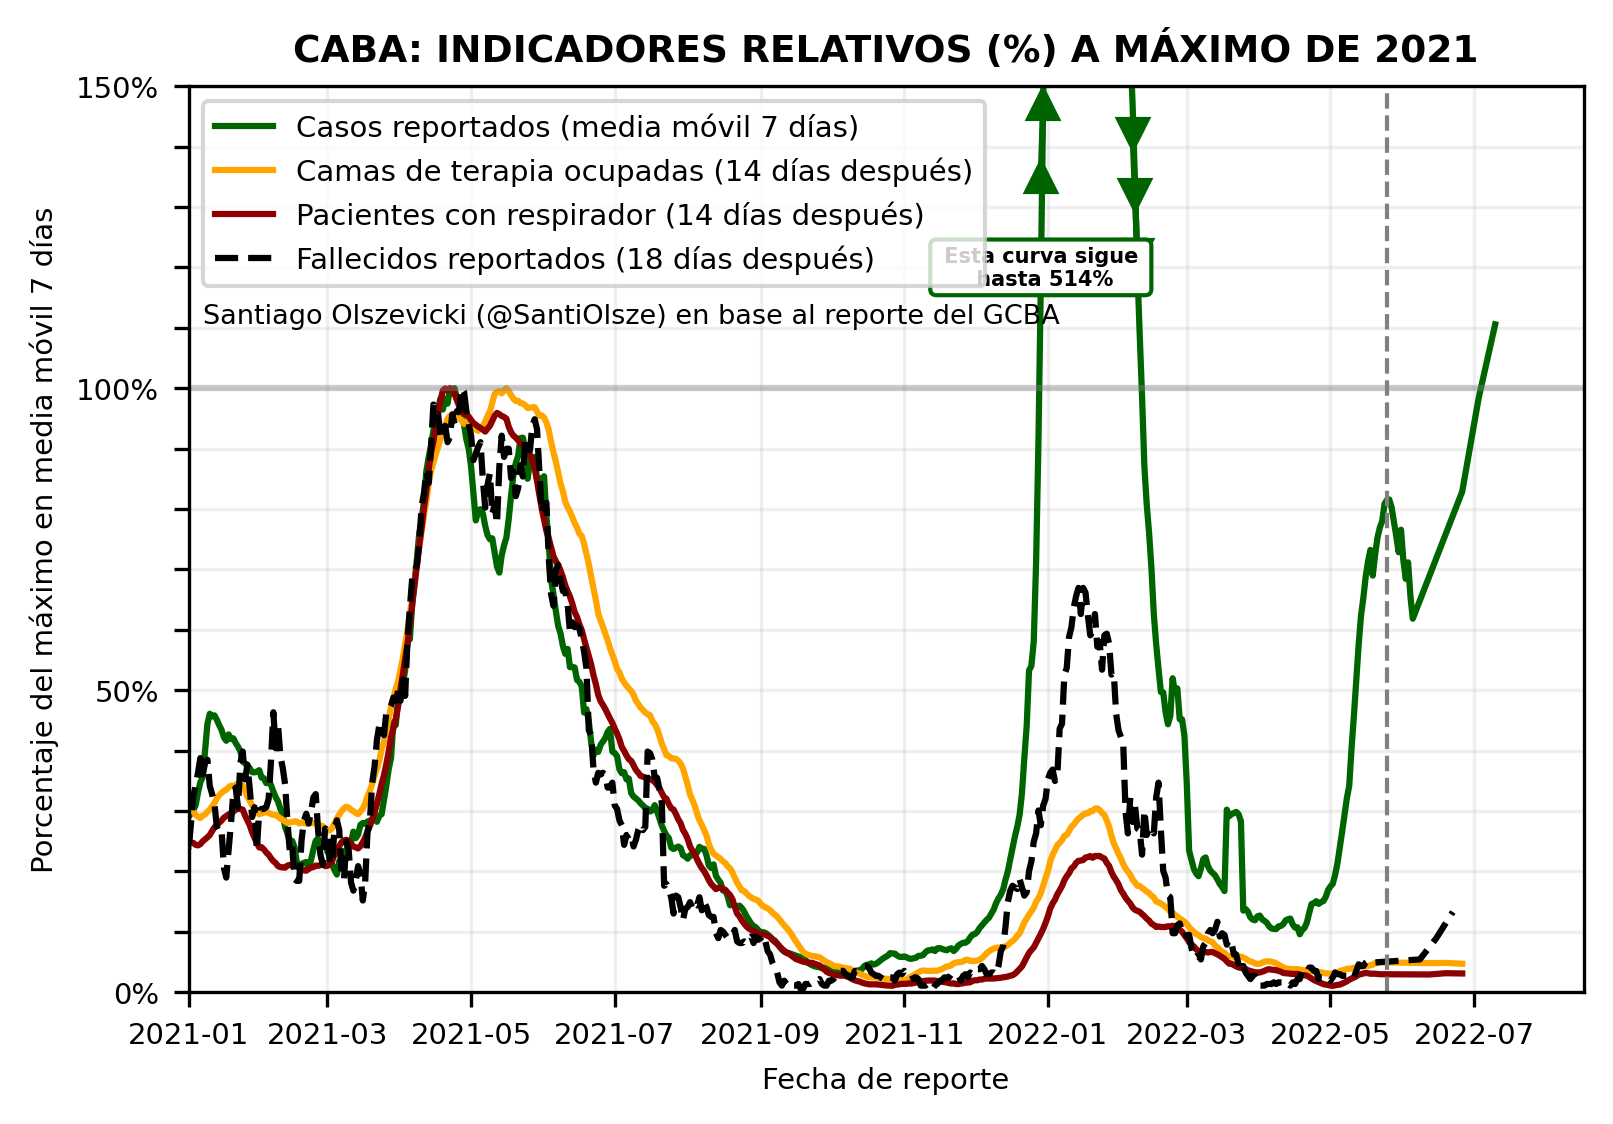

In [17]:
plot_rels(True);plt.savefig("caba_rels_stop", bbox_inches = "tight" )
#plot_rels(False) ;plt.savefig("caba_rels", bbox_inches = "tight" )

In [18]:
ola3

,FECHA,TIPO_REPORTE,TIPO_DATO,SUBTIPO_DATO,VALOR,FECHA_PROCESO,ID_CARGA,fecha,dias_desde_ola_2,dias_desde_ola_3
86185,20NOV2021:00:00:00,reporte_prensa,ocupacion_de_camas_sistema_publico,leves_total_hoteles_hospitales,128.00,12JUL2022:00:00:00,2691526,2021-11-20,264,0
82544,20NOV2021:00:00:00,reporte_prensa,plan_detectar_movil,hisopados_parque_chacabuco,227.00,12JUL2022:00:00:00,2691526,2021-11-20,264,0
84884,20NOV2021:00:00:00,conferencia_prensa,geriatricos,altas_institucionales,842.00,12JUL2022:00:00:00,2691526,2021-11-20,264,0
84885,20NOV2021:00:00:00,conferencia_prensa,geriatricos,%_mortalidad_acumulada,8.79,12JUL2022:00:00:00,2691526,2021-11-20,264,0
84886,20NOV2021:00:00:00,conferencia_prensa,geriatricos,recuperados_acumulados,5394.00,12JUL2022:00:00:00,2691526,2021-11-20,264,0
...,...,...,...,...,...,...,...,...,...,...
112239,05JUN2022:00:00:00,reporte_prensa,barrios_vulnerables,altas_reportados_del_dia,0.00,12JUL2022:00:00:00,2691526,2022-06-05,461,197
112238,05JUN2022:00:00:00,reporte_prensa,personas_hisopadas,personas_hisopadas_acumulados_no_caba,2284258.00,12JUL2022:00:00:00,2691526,2022-06-05,461,197
115373,05JUN2022:00:00:00,reporte_prensa,plan_detectar_movil,hisopados_barrio_palermo,61631.00,12JUL2022:00:00:00,2691526,2022-06-05,461,197
115356,05JUN2022:00:00:00,reporte_prensa,casos_residentes,recuperados_del_dia,2023.00,12JUL2022:00:00:00,2691526,2022-06-05,461,197


In [28]:
posit_ola_2

,FECHA,TIPO_REPORTE,TIPO_DATO,SUBTIPO_DATO,VALOR,FECHA_PROCESO,ID_CARGA,fecha,dias_desde_ola_2,dias_desde_ola_3
